**Setting Up the Environment**

In [33]:
!pip install numpy scikit-learn matplotlib tabulate
import pickle
import numpy as np
from sklearn import preprocessing, linear_model
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Task 3**

In [34]:
def split_array_randomly(arr, num_pieces):
    """Split array into random pieces of equal size."""
    np.random.seed(42)  # For reproducibility
    np.random.shuffle(arr)
    split_points = np.linspace(0, len(arr), num=num_pieces+1, dtype=int)
    return [arr[split_points[i]:split_points[i+1]] for i in range(num_pieces)]

def extract_features(dataset, feature_index=0):
    """Extract features from dataset and reshape."""
    return np.array([row[feature_index] for row in dataset]).reshape(-1, 1)

def calculate_metrics(predictions, true_value):
    """Calculate bias, variance, and MSE for given predictions."""
    mean_prediction = np.mean(predictions)
    bias = (mean_prediction - true_value) ** 2
    variance = np.mean((predictions - mean_prediction) ** 2)
    mse = np.mean((predictions - true_value) ** 2)
    irreducible_error = mse - (bias + variance)
    return bias, variance, mse, irreducible_error

# Load and prepare data
with open("data.pickle", "rb") as dataset:
    data = pickle.load(dataset)
    training_data = split_array_randomly(data['train'], 15)
    test_data = data['test']

# Initialize arrays to store metrics
degrees = range(1, 11)
bias_squared = []
variance = []
mse = []
irreducible_error = []

# Calculate metrics for each polynomial degree
for degree in degrees:
    poly = preprocessing.PolynomialFeatures(degree)
    models = []
    
    # Train 15 models
    for train_set in training_data:
        X_train = extract_features(train_set)
        y_train = extract_features(train_set, 1)
        X_poly = poly.fit_transform(X_train)
        
        model = linear_model.LinearRegression()
        model.fit(X_poly, y_train)
        models.append(model)
    
    # Calculate metrics for test data
    current_bias = current_var = current_mse = current_irr = 0
    
    for test_point in test_data:
        x_test = poly.transform(np.array(test_point[0]).reshape(-1, 1))
        true_value = test_point[1]
        predictions = [model.predict(x_test)[0][0] for model in models]
        
        point_bias, point_var, point_mse, point_irr = calculate_metrics(predictions, true_value)
        current_bias += point_bias
        current_var += point_var
        current_mse += point_mse
        current_irr += point_irr
    
    # Average metrics over test points
    n_test = len(test_data)
    bias_squared.append(current_bias / n_test)
    variance.append(current_var / n_test)
    mse.append(current_mse / n_test)
    irreducible_error.append(current_irr / n_test)

# Create tables
metrics_data = [[d, b, v, m] for d, b, v, m in zip(degrees, bias_squared, variance, mse)]


# Print tables
print("\nBias-Variance Trade-off Metrics:\n")
print(tabulate(metrics_data, 
               headers=["Degree", "Bias²", "Variance", "MSE"],
               tablefmt="pipe",
               floatfmt=".10f"))


Bias-Variance Trade-off Metrics:

|   Degree |        Bias² |     Variance |          MSE |
|---------:|-------------:|-------------:|-------------:|
|        1 | 2.5705752217 | 0.0719870009 | 2.6425622227 |
|        2 | 2.5336615747 | 0.1204423401 | 2.6541039148 |
|        3 | 2.0149890221 | 0.2003840653 | 2.2153730874 |
|        4 | 1.7492114984 | 0.2822000902 | 2.0314115886 |
|        5 | 1.6255842674 | 0.4992947499 | 2.1248790173 |
|        6 | 1.6229782024 | 0.6833792933 | 2.3063574957 |
|        7 | 1.7129324590 | 0.9074129359 | 2.6203453949 |
|        8 | 2.4828464050 | 2.0154446887 | 4.4982910937 |
|        9 | 4.5432052556 | 1.9272324919 | 6.4704377476 |
|       10 | 5.8334658868 | 3.0792576905 | 8.9127235773 |


# **Task 4**

In [35]:
error_data = [[d, e] for d, e in zip(degrees, irreducible_error)]

print("\nIrreducible Error Analysis:\n")
print(tabulate(error_data,
               headers=["Degree", "Irreducible Error"],
               tablefmt="pipe",
               floatfmt=".6e"))


Irreducible Error Analysis:

|   Degree |   Irreducible Error |
|---------:|--------------------:|
|        1 |       -1.321859e-16 |
|        2 |        1.023660e-15 |
|        3 |        3.665471e-16 |
|        4 |        3.877107e-16 |
|        5 |       -5.107026e-16 |
|        6 |       -6.269291e-16 |
|        7 |        1.148213e-15 |
|        8 |       -1.977585e-17 |
|        9 |        1.448494e-15 |
|       10 |        3.241331e-16 |


# **Task 5**

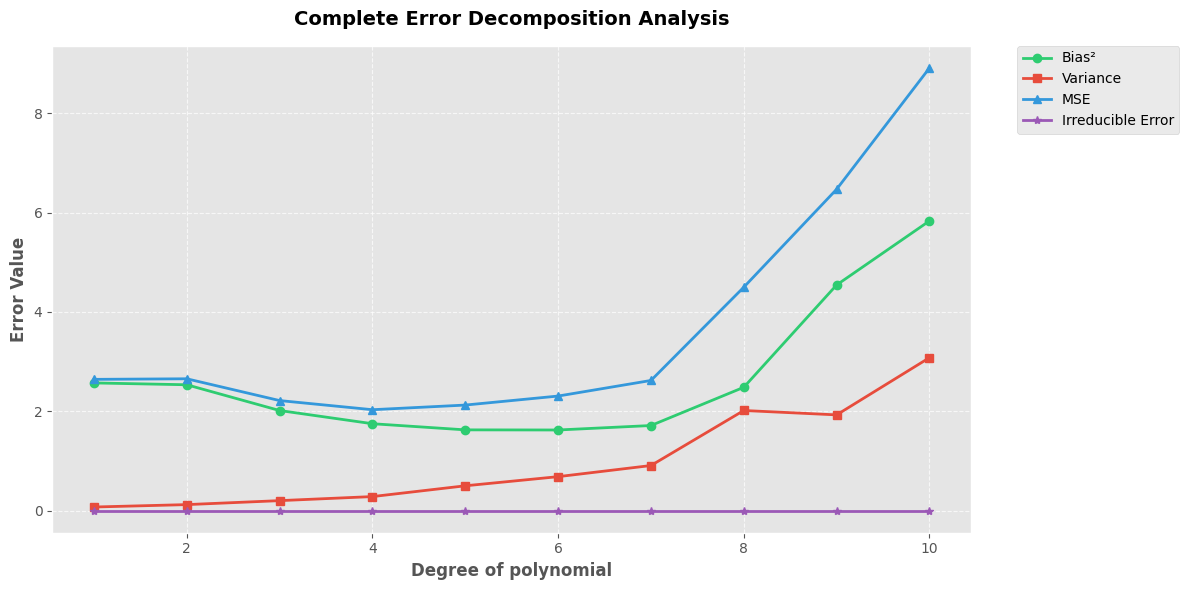

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

x = np.arange(1, 11)

# Plot all components with consistent styling
plt.plot(x, bias_squared, marker='o', linestyle='-', linewidth=2, color='#2ecc71', label='Bias²')
plt.plot(x, variance, marker='s', linestyle='-', linewidth=2, color='#e74c3c', label='Variance')
plt.plot(x, mse, marker='^', linestyle='-', linewidth=2, color='#3498db', label='MSE')
plt.plot(x, irreducible_error, marker='*', linestyle='-', linewidth=2, color='#9b59b6', label='Irreducible Error')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Degree of polynomial", fontsize=12, fontweight='bold')
plt.ylabel("Error Value", fontsize=12, fontweight='bold')
plt.title("Complete Error Decomposition Analysis", fontsize=14, fontweight='bold', pad=15)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True)
plt.tight_layout()
plt.show()

# **Task 6**

c:\Users\varun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01198e-45): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\varun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01198e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\varun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01198e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\varun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat


Polynomial Regression (No Regularization):
MSE: 3.476470

Ridge Regression Results:
|         Alpha |          MSE |
|--------------:|-------------:|
|  0.1000000000 | 1.6266983740 |
|  1.0000000000 | 1.6265616301 |
| 10.0000000000 | 1.6252945866 |

Lasso Regression Results:
|         Alpha |          MSE |
|--------------:|-------------:|
|  0.1000000000 | 1.6413537630 |
|  1.0000000000 | 1.6698321931 |
| 10.0000000000 | 2.3777696994 |


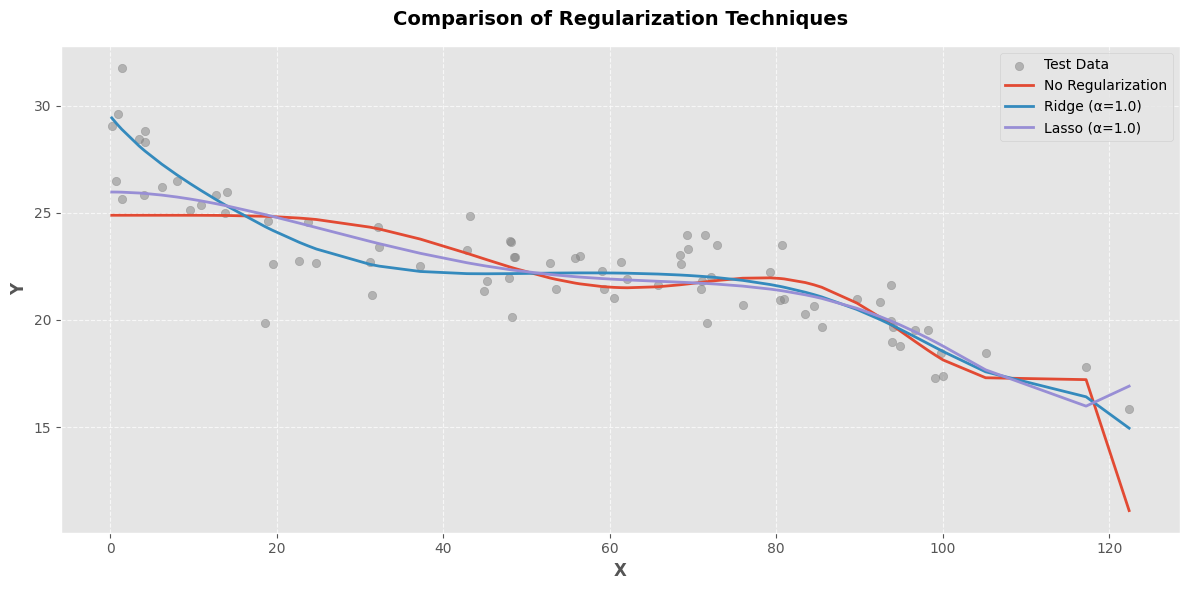

In [ ]:
def get_XY(data):
    X = np.array([point[0] for point in data]).reshape(-1, 1)
    Y = np.array([point[1] for point in data]).reshape(-1, 1)
    return X, Y

# Load data
with open("data.pickle", "rb") as dataset:
    data = pickle.load(dataset)
    train_data = data['train']
    test_data = data['test']

X_train, Y_train = get_XY(train_data)
X_test, Y_test = get_XY(test_data)

# Create polynomial features
poly = preprocessing.PolynomialFeatures(10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# (a) Polynomial Regression without regularization
model = linear_model.LinearRegression()
model.fit(X_train_poly, Y_train)
y_pred = model.predict(X_test_poly)
mse_poly = mean_squared_error(Y_test, y_pred)

# (b) Ridge Regression
alphas = [0.1, 1.0, 10.0]
ridge_results = []
for alpha in alphas:
    ridge_model = linear_model.Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, Y_train)
    y_pred_ridge = ridge_model.predict(X_test_poly)
    mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
    ridge_results.append([alpha, mse_ridge])

# (c) Lasso Regression
lasso_results = []
for alpha in alphas:
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, Y_train)
    y_pred_lasso = lasso_model.predict(X_test_poly)
    mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
    lasso_results.append([alpha, mse_lasso])

# Print results in tables
print("\nPolynomial Regression (No Regularization):")
print(f"MSE: {mse_poly:.6f}")

print("\nRidge Regression Results:")
print(tabulate(ridge_results, 
              headers=["Alpha", "MSE"],
              tablefmt="pipe",
              floatfmt=".10f"))

print("\nLasso Regression Results:")
print(tabulate(lasso_results,
              headers=["Alpha", "MSE"],
              tablefmt="pipe",
              floatfmt=".10f"))

# Visualization
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

# Plot test data points
plt.scatter(X_test, Y_test, color='gray', alpha=0.5, label='Test Data')

# Sort X values for smooth curve plotting
X_plot = np.sort(X_test, axis=0)
X_plot_poly = poly.transform(X_plot)

# Plot predictions
plt.plot(X_plot, model.predict(X_plot_poly), 
         label='No Regularization', linewidth=2)
plt.plot(X_plot, ridge_model.predict(X_plot_poly), 
         label=f'Ridge (α={alphas[1]})', linewidth=2)
plt.plot(X_plot, lasso_model.predict(X_plot_poly), 
         label=f'Lasso (α={alphas[1]})', linewidth=2)

plt.xlabel('X', fontsize=12, fontweight='bold')
plt.ylabel('Y', fontsize=12, fontweight='bold')
plt.title('Comparison of Regularization Techniques', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
